In [3]:
#!/usr/bin/env python3
import csv
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [4]:
def read_position(file):
    # t = []
    x = []
    y = []
    z = []
    d = [] 
    reader = csv.reader(open(file))
    data = [row for row in reader]

    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        z.append(float(row[3]))
        a = np.sqrt(float(row[1])**2 + float(row[2])**2 + float(row[3])**2)
        d.append(float(a))
    
    return x, y, z, d


def read_position_noZ(file):
    x = []
    y = []
    d = []
    # t = []
    reader = csv.reader(open(file))
    data = [row for row in reader]

    for row in data[1:]:
        if row[1] == '':
            continue
        # t.append(float(row[0]))
        x.append(float(row[1]))
        y.append(float(row[2]))
        a = np.sqrt(float(row[1])**2 + float(row[2])**2)
        d.append(float(a))
    
    return x, y, d

In [5]:
file1_paths = ['./csv_1/0_1.csv.converted.csv', 
              './csv_1/0_2.csv.converted.csv', 
              './csv_1/0_3.csv.converted.csv', 
             './csv_1/1_2.csv.converted.csv', 
             './csv_1/1_3.csv.converted.csv', 
             './csv_1/2_3.csv.converted.csv']

file2_paths = ['./csv_2/0_1.csv.converted.csv', 
              './csv_2/0_2.csv.converted.csv', 
              './csv_2/0_3.csv.converted.csv', 
             './csv_2/1_2.csv.converted.csv', 
             './csv_2/1_3.csv.converted.csv', 
             './csv_2/2_3.csv.converted.csv']

In [6]:
def graph1(file_path):
    x, y, z, d = read_position(file_path)

    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(18, 14), dpi=90)
    print('--------------------')
    for ax, col, data, name in zip(axes.ravel(), 
                                        ['orange','r','b','g'], 
                                        [d,x,y,z], 
                                        ['D','X','Y','Z']):
        lmax = len(data)
        ax.set_title(name)
        ax.plot(data, '.', color=col)
        ax.hlines([np.mean(data)], 0, lmax, "black",label='mean')
        ax.set_xlabel('time')
        ax.set_ylabel('distance[m]')
        ax.legend()
        print(f"{name}", '&',  
              '{:.03f}'.format(np.mean(data)), 
              '&', '{:.03f}'.format(max(abs(data-np.mean(data)))), 
              '&', '{:.03f}'.format(np.std(data)))

In [7]:
def output1(files):
    for file, tag in zip(files, ['0_1','0_2','0_3','1_2','1_3','2_3']):
        print(tag,'& \(平均 [m] \) & \偏差 [m] \) & \(標準偏差 \) ', )
        graph1(file)
        plt.show()

In [9]:
# output1(file1_paths)

In [10]:
# output1(file2_paths)

In [11]:
def graph2(file_path, ylim):
    x, y, z, d = read_position(file_path)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_z = np.mean(z)
    mean_d = np.mean(d)
    lmax = len(x)
    
    # Plot
    # fig, axes = plt.subplots(2, 2, figsize=(9, 7), dpi=90)
    fig, axes = plt.subplots(figsize=(9, 7), dpi=90)
    
    for col, data, mean, name in zip(['orange','r','b','g'],
                                     [d,x,y,z],
                                     [mean_d,mean_x,mean_y,mean_z],
                                     ['D','x','y','z']):
        plt.plot(data-mean, '.', color=col, label=name)
        plt.legend()
        axes.xaxis.set_visible(True)
        axes.set_xlabel('time')
        axes.set_ylabel('Distance[m]')
        plt.hlines([0], 0, lmax, "black")
    axes.set_ylim(-ylim,ylim)
    plt.show()

def output2(files, ylim):
    for file, tag in zip(files, ['0_1','0_2','0_3','1_2','1_3','2_3']):
        print(tag)
        graph2(file, ylim)
        plt.show()

In [31]:
# output2(file1_paths, 1)

In [30]:
# output2(file2_paths,1)

In [21]:
def output_graph_noZ(file_path, ylim):
    x=[]
    y=[]
    d=[]
    
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_d = np.mean(d)
    
    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(9, 7), dpi=90)
    
    for ax, col, data, mean, name in zip(axes.ravel(), 
                                        ['orange','r','b'], 
                                        [d,x,y],
                                        [mean_d,mean_x,mean_y],
                                        ['D*','X*','Y*']):
        lmax = len(data)
        ax.set_title(name)
        ax.set_ylim(-ylim, ylim)
        ax.axes.xaxis.set_visible(False)
        ax.plot(data-mean, '.', color=col)
        ax.hlines([0], 0, lmax, "black")

In [22]:
# graphs2_noZ(file2_paths,0.3)

Tag position Ex1
Distance(0-1)= 5.0093 m
Distance(0-2)= 10.1227 m
Distance(0-3)= 15.1692 m
-------


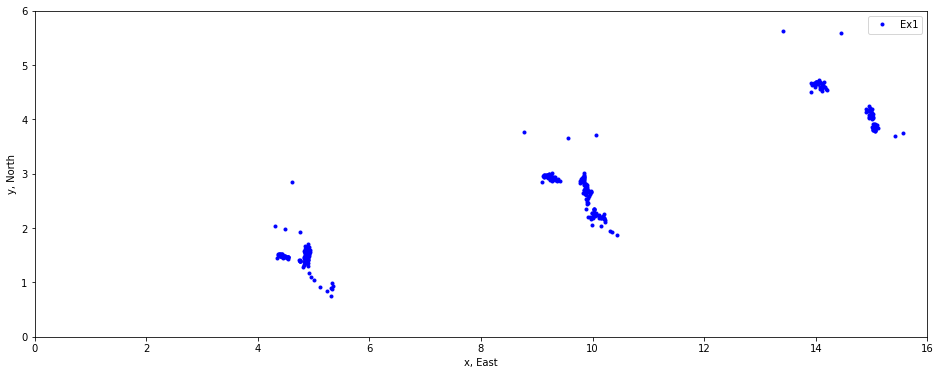

Tag position Ex2
Distance(0-1)= 4.8557 m
Distance(0-2)= 9.7142 m
Distance(0-3)= 14.6543 m
-------


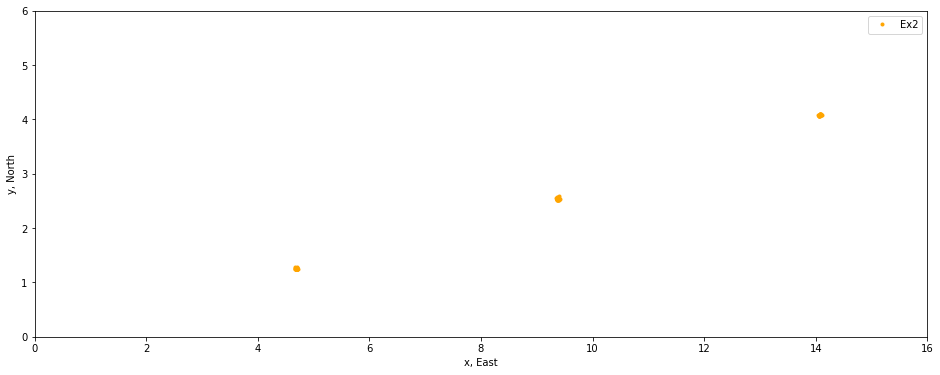

In [33]:


for file, title, col, label in zip([file1_paths, file2_paths],
                                   ['Tag position Ex1', 'Tag position Ex2'],
                                   ['b','orange'],
                                   ['Ex1', 'Ex2']):
    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(111)
    x0_1, y0_1, d0_1 = read_position_noZ(file[0])
    x0_2, y0_2, d0_2 = read_position_noZ(file[1])
    x0_3, y0_3, d0_3 = read_position_noZ(file[2])

    mean_d = [np.mean(d0_1), np.mean(d0_2), np.mean(d0_3)]
    
    print(title)
    print('Distance(0-1)=', '{:.04f}'.format(mean_d[0]),'m')
    print('Distance(0-2)=', '{:.04f}'.format(mean_d[1]),'m')
    print('Distance(0-3)=', '{:.04f}'.format(mean_d[2]),'m')
    print('-------')

    x = x0_1 + x0_2 + x0_3
    y = y0_1 + y0_2 + y0_3
    
    
    ax.set_ylim(0, 6)
    ax.set_xlim(0, 16)
    ax.set_xlabel('x, East')
    ax.set_ylabel('y, North')
    ax.plot(x, y, '.', color=col,label=label)
    plt.legend()
    plt.show()

# plt.show()